# Prediction of Heart disease using Deep Neural Network

The data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

Acknowledgement: This data comes from the University of California Irvine's Machine Learning Repository at https://archive.ics.uci.edu/ml/datasets/Heart+Disease.

The dataset contains 14 attributes:
1.  (age) :  age in years
2.  (sex) :  sex (1 = male; 0 = female)
3.  (cp) :  chest pain type
4.  (trestbps) :  Resting Blood presssure in mm Hg
5.  (chol) :  serum cholesterol in mg/dl
6.  (fbs) :  Fasting Blood Sugar in mg/dl
7.  (restecg) :  Resting Electrocadiographic Results
8.  (thalach) :  Maximum Heart Rate achieved
9.  (exang) :  exercise induced angina 
10. (oldpeak) :  ST depression induced by exercise relative to rest
11. (slope) :  slope of the Peak Exercise ST segment
12. (ca):  number of major vessels (0-3) colored by flourosopy
13. (thal) :  3 = normal; 6 = fixed defect; 7 = reversable defect
14. (target) :  (the predicted attribute) . Diagnosis of heart disease (angiographic disease status) Values:0(absence) & 1(presence)

# Importing the required libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.math import confusion_matrix
from keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from keras import regularizers

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Loading and preparing data

In [3]:
#load and display dataframe
heart_disease=r"C:\Users\val-c\Desktop\heart disease\heart.csv"
hrt_dis=pd.read_csv(heart_disease)
hrt_dis.head() #display first-five rows

print('\n') #hold back

#display last five rows of the dataframe
hrt_dis.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [4]:
#no of rows and columns
print('(rows,cols) =',hrt_dis.shape)

(rows,cols) = (1025, 14)


In [5]:
#display data types for the dataframe
hrt_dis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
#calculate the existing NaN/missing values in the datasets

hrt_dis.isna().sum().to_frame('Total')

,Total
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


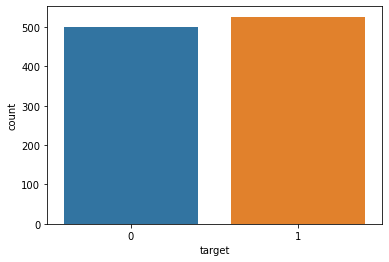

1    526
0    499
Name: target, dtype: int64


In [7]:
#show the number of persons who go heart disease or not.
y=('target')
sns.countplot(y, data=hrt_dis)
plt.show()
print(hrt_dis.target.value_counts())

526 number of persons got heart disease, while 499 got not

In [8]:
#statistics of the attributes
dist=hrt_dis.describe().transpose()
dist

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


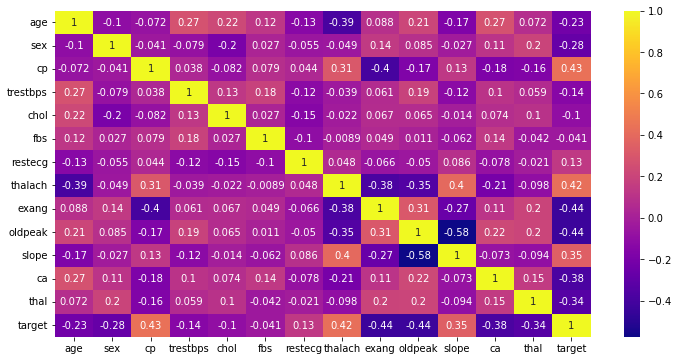

In [9]:
#correlation between attributes
plt.figure(figsize=(12,6))
corrl=hrt_dis.corr()
sns.heatmap(corrl, annot=True, cmap="plasma")
plt.show()

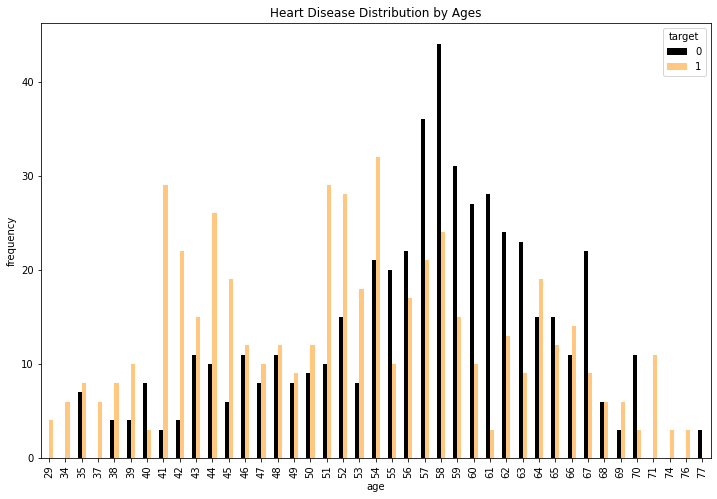

In [10]:
#visualize the distribution of ages to heart disease
pd.crosstab(hrt_dis.age, hrt_dis.target).plot(kind="bar",figsize=(12,8),cmap='copper')
plt.title("Heart Disease Distribution by Ages")
plt.xlabel('age')
plt.ylabel('frequency')
plt.show()

In [ ]:
#check for outliers with the boxplot
plt.figure(figsize=(12,12))
_=sns.boxplot(data=hrt_dis) #display figue


In [ ]:
#explore the attributes distribution before normalizing
hrt_dis.hist(figsize =(12, 11))
plt.show()#display dist...

# Creating training and testing sets

In [13]:
hrt_dis_features = hrt_dis.copy()
hrt_dis_labels = hrt_dis_features.pop('target') #drop attribute 'target'=label

In [14]:
hrt_dis_features = np.array( hrt_dis_features)
X=hrt_dis_features #features
Y=hrt_dis_labels # target 

In [15]:
#split data into train _ test
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=42)

print("number of training samples:",x_train.shape[0])

print("number of test samples:", x_test.shape[0])

number of training samples: 922
number of test samples: 103


# Normalization and Standardization 

In [16]:
normalizer = preprocessing.Normalizer()  #normalizer function
normalized_x_test= normalizer.fit_transform(x_test) #normalize test set
print('normalized x_test')
normalized_x_test[:1]


normalized x_test


array([[0.20726746, 0.        , 0.        , 0.41453492, 0.69869193,
        0.        , 0.00334302, 0.54491284, 0.        , 0.        ,
        0.00668605, 0.        , 0.00668605]])

In [17]:
# Instantiating MinMaxScaler and using it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [18]:
#Extracting validation sample
x_train = x_train[:-102]
y_train = y_train[:-102]

x_val =x_train[-102:]
y_val = y_train[-102:]

print("new training samples:",x_train.shape[0])

print("number of validation samples:",x_val.shape[0])

new training samples: 820
number of validation samples: 102


In [19]:
# convert to categorical label
from keras.utils.np_utils import to_categorical 

Y_train = to_categorical(y_train, num_classes=None) 
Y_test = to_categorical(y_test, num_classes=None) 
Y_val = to_categorical(y_val, num_classes=None)

# Creating the model

Deep neural network was configured here

In [20]:
#configuration.....
model = Sequential()
model.add(Dense(16, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2, activation="softmax"))

In [21]:
model.summary() #summary of the model configuration

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                224       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 2)                 18        
                                                                 
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________


# Compile the model

In [22]:
#compiling......
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer=opt,metrics=['accuracy'])

# Train the model

In [23]:
#train the sets...
history=model.fit(x_train, Y_train,validation_data=(x_val, Y_val),epochs=300, batch_size=10,)  
print('done')

Epoch 1/300
82/82 [==============================] - 2s 7ms/step - loss: 0.6867 - accuracy: 0.5780 - val_loss: 0.6702 - val_accuracy: 0.7647
Epoch 2/300
82/82 [==============================] - 0s 3ms/step - loss: 0.6228 - accuracy: 0.7598 - val_loss: 0.5666 - val_accuracy: 0.7647
Epoch 3/300
82/82 [==============================] - 0s 3ms/step - loss: 0.5173 - accuracy: 0.7890 - val_loss: 0.4893 - val_accuracy: 0.7843
Epoch 4/300
82/82 [==============================] - 0s 3ms/step - loss: 0.4536 - accuracy: 0.8122 - val_loss: 0.4353 - val_accuracy: 0.8039
Epoch 5/300
82/82 [==============================] - 0s 3ms/step - loss: 0.4592 - accuracy: 0.8159 - val_loss: 0.4357 - val_accuracy: 0.7843
Epoch 6/300
82/82 [==============================] - 0s 3ms/step - loss: 0.4404 - accuracy: 0.8183 - val_loss: 0.4119 - val_accuracy: 0.8235
Epoch 7/300
82/82 [==============================] - 0s 3ms/step - loss: 0.4288 - accuracy: 0.8354 - val_loss: 0.4127 - val_accuracy: 0.8235
Epoch 8/300
8

Epoch 59/300
82/82 [==============================] - 0s 3ms/step - loss: 0.3284 - accuracy: 0.8780 - val_loss: 0.2974 - val_accuracy: 0.9118
Epoch 60/300
82/82 [==============================] - 0s 3ms/step - loss: 0.3160 - accuracy: 0.8890 - val_loss: 0.2957 - val_accuracy: 0.8725
Epoch 61/300
82/82 [==============================] - 0s 3ms/step - loss: 0.3257 - accuracy: 0.8805 - val_loss: 0.2969 - val_accuracy: 0.8725
Epoch 62/300
82/82 [==============================] - 0s 3ms/step - loss: 0.3313 - accuracy: 0.8756 - val_loss: 0.3067 - val_accuracy: 0.8922
Epoch 63/300
82/82 [==============================] - 0s 3ms/step - loss: 0.3212 - accuracy: 0.8768 - val_loss: 0.2966 - val_accuracy: 0.9020
Epoch 64/300
82/82 [==============================] - 0s 3ms/step - loss: 0.3201 - accuracy: 0.8817 - val_loss: 0.2937 - val_accuracy: 0.9118
Epoch 65/300
82/82 [==============================] - 0s 3ms/step - loss: 0.3177 - accuracy: 0.8854 - val_loss: 0.2913 - val_accuracy: 0.9216
Epoch 

82/82 [==============================] - 0s 3ms/step - loss: 0.3164 - accuracy: 0.8878 - val_loss: 0.2629 - val_accuracy: 0.9118
Epoch 117/300
82/82 [==============================] - 0s 4ms/step - loss: 0.3020 - accuracy: 0.8915 - val_loss: 0.2594 - val_accuracy: 0.9314
Epoch 118/300
82/82 [==============================] - 0s 4ms/step - loss: 0.2936 - accuracy: 0.8927 - val_loss: 0.2575 - val_accuracy: 0.9412
Epoch 119/300
82/82 [==============================] - 0s 3ms/step - loss: 0.2856 - accuracy: 0.9024 - val_loss: 0.2597 - val_accuracy: 0.9216
Epoch 120/300
82/82 [==============================] - 0s 3ms/step - loss: 0.2931 - accuracy: 0.8878 - val_loss: 0.2626 - val_accuracy: 0.9314
Epoch 121/300
82/82 [==============================] - 0s 3ms/step - loss: 0.2795 - accuracy: 0.9000 - val_loss: 0.2501 - val_accuracy: 0.9216
Epoch 122/300
82/82 [==============================] - 0s 3ms/step - loss: 0.2989 - accuracy: 0.9000 - val_loss: 0.2680 - val_accuracy: 0.9412
Epoch 123/300

82/82 [==============================] - 0s 3ms/step - loss: 0.2650 - accuracy: 0.9024 - val_loss: 0.2083 - val_accuracy: 0.9412
Epoch 174/300
82/82 [==============================] - 0s 3ms/step - loss: 0.2563 - accuracy: 0.9122 - val_loss: 0.2098 - val_accuracy: 0.9314
Epoch 175/300
82/82 [==============================] - 0s 2ms/step - loss: 0.2931 - accuracy: 0.8951 - val_loss: 0.2051 - val_accuracy: 0.9412
Epoch 176/300
82/82 [==============================] - 0s 3ms/step - loss: 0.2728 - accuracy: 0.9049 - val_loss: 0.2096 - val_accuracy: 0.9314
Epoch 177/300
82/82 [==============================] - 0s 3ms/step - loss: 0.2746 - accuracy: 0.9000 - val_loss: 0.2187 - val_accuracy: 0.9412
Epoch 178/300
82/82 [==============================] - 0s 3ms/step - loss: 0.2739 - accuracy: 0.8976 - val_loss: 0.2196 - val_accuracy: 0.9412
Epoch 179/300
82/82 [==============================] - 0s 3ms/step - loss: 0.2832 - accuracy: 0.9061 - val_loss: 0.2109 - val_accuracy: 0.9412
Epoch 180/300

82/82 [==============================] - 0s 3ms/step - loss: 0.2781 - accuracy: 0.9061 - val_loss: 0.2024 - val_accuracy: 0.9412
Epoch 231/300
82/82 [==============================] - 0s 3ms/step - loss: 0.2554 - accuracy: 0.9134 - val_loss: 0.1985 - val_accuracy: 0.9412
Epoch 232/300
82/82 [==============================] - 0s 3ms/step - loss: 0.2576 - accuracy: 0.9098 - val_loss: 0.1978 - val_accuracy: 0.9412
Epoch 233/300
82/82 [==============================] - 0s 3ms/step - loss: 0.2677 - accuracy: 0.9037 - val_loss: 0.1894 - val_accuracy: 0.9412
Epoch 234/300
82/82 [==============================] - 0s 3ms/step - loss: 0.2489 - accuracy: 0.9232 - val_loss: 0.1950 - val_accuracy: 0.9412
Epoch 235/300
82/82 [==============================] - 0s 2ms/step - loss: 0.2765 - accuracy: 0.9037 - val_loss: 0.1905 - val_accuracy: 0.9412
Epoch 236/300
82/82 [==============================] - 0s 2ms/step - loss: 0.2435 - accuracy: 0.9085 - val_loss: 0.2018 - val_accuracy: 0.9314
Epoch 237/300

82/82 [==============================] - 0s 3ms/step - loss: 0.2480 - accuracy: 0.9146 - val_loss: 0.1742 - val_accuracy: 0.9412
Epoch 288/300
82/82 [==============================] - 0s 3ms/step - loss: 0.2565 - accuracy: 0.9220 - val_loss: 0.1683 - val_accuracy: 0.9706
Epoch 289/300
82/82 [==============================] - 0s 3ms/step - loss: 0.2391 - accuracy: 0.9195 - val_loss: 0.1669 - val_accuracy: 0.9706
Epoch 290/300
82/82 [==============================] - 0s 3ms/step - loss: 0.2293 - accuracy: 0.9183 - val_loss: 0.1786 - val_accuracy: 0.9706
Epoch 291/300
82/82 [==============================] - 0s 3ms/step - loss: 0.2358 - accuracy: 0.9146 - val_loss: 0.1776 - val_accuracy: 0.9412
Epoch 292/300
82/82 [==============================] - 0s 3ms/step - loss: 0.2322 - accuracy: 0.9280 - val_loss: 0.1727 - val_accuracy: 0.9608
Epoch 293/300
82/82 [==============================] - 0s 3ms/step - loss: 0.2416 - accuracy: 0.9159 - val_loss: 0.1692 - val_accuracy: 0.9412
Epoch 294/300

# Visualizing the training results

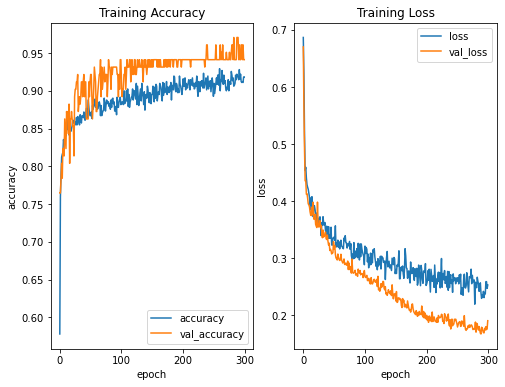

In [24]:

#training history
loss = history.history['loss']
val_loss = history.history['val_loss']
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']


#'Training and Validation loss
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy']) #plot accuracy
plt.plot(history.history['val_accuracy']) #plot val_acc
plt.title('Training Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'])

#Training and Validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['loss']) #plot loss
plt.plot(history.history['val_loss']) #plot val_loss
plt.title('Training Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'])

#display plot
plt.show()

# Evaluate accuracy on test set

In [25]:
#evaluate on test set
model.evaluate(x_test,Y_test)

4/4 [==============================] - 0s 7ms/step - loss: 0.3469 - accuracy: 0.8932


[0.34692591428756714, 0.893203854560852]

# Make prediction on the test set

In [26]:
#predict on test data
predictions = model.predict(x_test)
#print(predictions.shape)
pred_category = np.argmax(predictions, axis=1)

#classification report
print("Results")
print('accuracy_score =',accuracy_score(y_test,pred_category))
print(classification_report(y_test, pred_category))

4/4 [==============================] - 0s 8ms/step
Results
accuracy_score = 0.8932038834951457
              precision    recall  f1-score   support

           0       0.94      0.86      0.90        58
           1       0.84      0.93      0.88        45

    accuracy                           0.89       103
   macro avg       0.89      0.90      0.89       103
weighted avg       0.90      0.89      0.89       103



In [27]:
#confusion matrix...
cf_matrix=confusion_matrix(y_test,pred_category)
cf_matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[50,  8],
       [ 3, 42]])>

In [28]:
#defining the confusion matrix heatmap
def plot_conf(cf_matrix):
    ax = sns.heatmap(cf_matrix, annot=True, cmap='plasma')

    ax.set_title(' Confusion Matrix:Testing');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    #Tick labels 
    ax.xaxis.set_ticklabels(['0','1'])
    ax.yaxis.set_ticklabels(['0','1'])

    #Display Matrix
    plt.show()

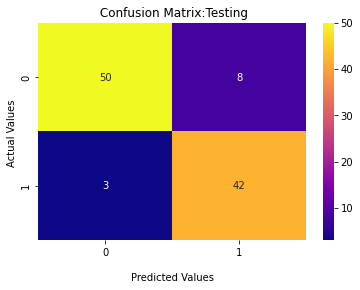

In [29]:
#visualize performance
plot_conf(cf_matrix) 

In the target variable 0 represents the patient has not heart disease and 1 represent patient has heart disease. So,according to the given confusion matrix it can be seen that an accuracy of 89.3% is obtained. There is a total of 58 patients in test data which do not have heart disease out of which 50 were classified successfully and the 3 remaining were wrongly classified as positive for heart disease. Similarly, in the case of 45 patients who actually had heart disease, out of these 45 patients, 8 were classified to be negative and 42 as positive. The Final error in the model is 10.7%. The group of patient which are checked for the heart disease are categorized in four parts:

- True positive (TP): these are the patients which are classified are negative for heart disease and actually they don’t have any heart disease.
- False Positive(FP): This is the group of patients which are classified wrongly as positive i.e. they have heart disease
- True Negative(TN): The group of patients which are actually diagnosed with heart disease and model classify them as positive for heart disease .
- False Negative(FN): This is the group of patients which do not have the heart disease but the model showed that they have heart disease.

# Save model

In [30]:
model.save('heart disease')
#reloaded_model = tf.keras.models.load_model('heart disease')

INFO:tensorflow:Assets written to: heart disease\assets


# Summary of the Classification Measure

Accuracy: It is a measure of correctness that is achieved in true prediction.
          Simply measures how often the classifier makes the correct prediction, (TP & TN)

Precision:It is a measure of correctness that is achieved in true prediction too.
           it tells how many predictions that are actually positive out of all the total positive predicted.

Recall:It measures the actual observations which are predicted correctly, i.e, 
       how many observations of positive class are actually predicted as positive. It is also known as Sensitivity. 
       Recall is a valid choice of evaluation metric when you want to capture as many positives as possible.
        
F1-Score: F1 score is a harmonic mean of Precision and Recall.
          F1 score sort of maintains a balance between the precision and recall for your classifier  